## Написать скрипт, который нарисует множество Мандельброта

C:\Users\user\AppData\Local\Temp\ipykernel_20756\2431199737.py:23: RuntimeWarning: overflow encountered in square
  Z = Z**2 + C
C:\Users\user\AppData\Local\Temp\ipykernel_20756\2431199737.py:23: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + C


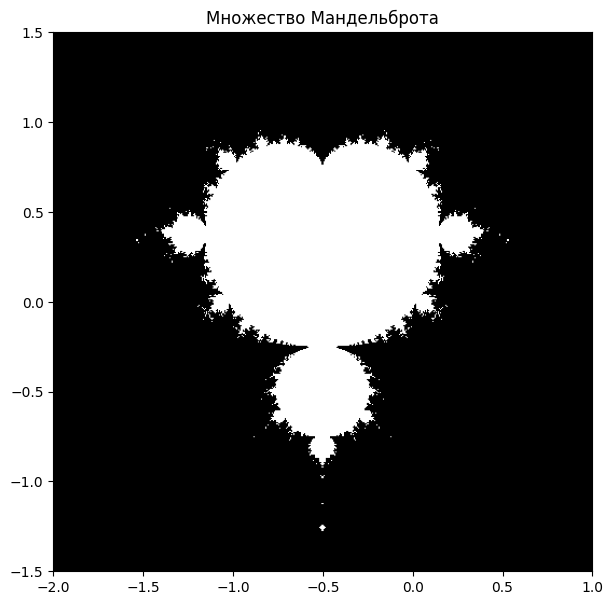

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
N_max = 40       # Максимальное количество итераций
some_threshold = 50  # Порог для определения принадлежности к множеству Мандельброта
x_min, x_max = -2, 1  # Диапазон по оси x
y_min, y_max = -1.5, 1.5  # Диапазон по оси y
width, height = 500, 500  # Размер изображения

# Создание сетки значений c = x + 1j*y
x = np.linspace(x_min, x_max, width)
y = np.linspace(y_min, y_max, height)
C = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
C = C[:, 0] + 1j * C[:, 1]

# Mассив для хранения результатов
Z = np.zeros(C.shape, dtype=np.complex128)
mask = np.zeros(C.shape, dtype=bool)

for j in range(N_max):
    # Обновление Z
    Z = Z**2 + C
    # Проверка, какие точки не вышли за порог
    mask |= (np.abs(Z) > some_threshold)

# Формирование маски, указывающей, какие точки входят в набор
mask = ~mask.reshape(height, width)


# Сохранение результата в виде изображения
plt.figure(figsize=(10, 7))
plt.imshow(mask, extent=(x_min, x_max, y_min, y_max), cmap=plt.cm.gray, origin='lower')
plt.title('Множество Мандельброта')
plt.savefig('mandelbrot_set.png', dpi=300)
plt.show()
